<a href="https://colab.research.google.com/github/hiris25/Worm-Connectome-Polarity/blob/main/ACh_degree_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [2]:
#import files from cengen expression 

from google.colab import files
uploaded = files.upload()

Saving expression_allgroups_thr4_correct_nmj.csv to expression_allgroups_thr4_correct_nmj.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['expression_allgroups_thr4_correct_nmj.csv']))
df_withzero = df

# Correlation Pltos

In [10]:
#replace zero wiht NaN
df = df.replace({'0':np.nan, 0:np.nan})

df['Ach_in'] = df['Ach_in'].replace(np.nan, 0)
df['Ach_out'] = df['Ach_out'].replace(np.nan, 0)

In [11]:
#make df for plotting
df_ACh_degree = pd.DataFrame()

df_ACh_degree['Neuron_class'] = df['Neuron_class']
df_ACh_degree['Ach_in'] = df['Ach_in']
df_ACh_degree['Ach_out'] = df['Ach_out']

df_exp = df.drop(['Neuron_class', 'Ach_in', 'Ach_out'], axis=1)

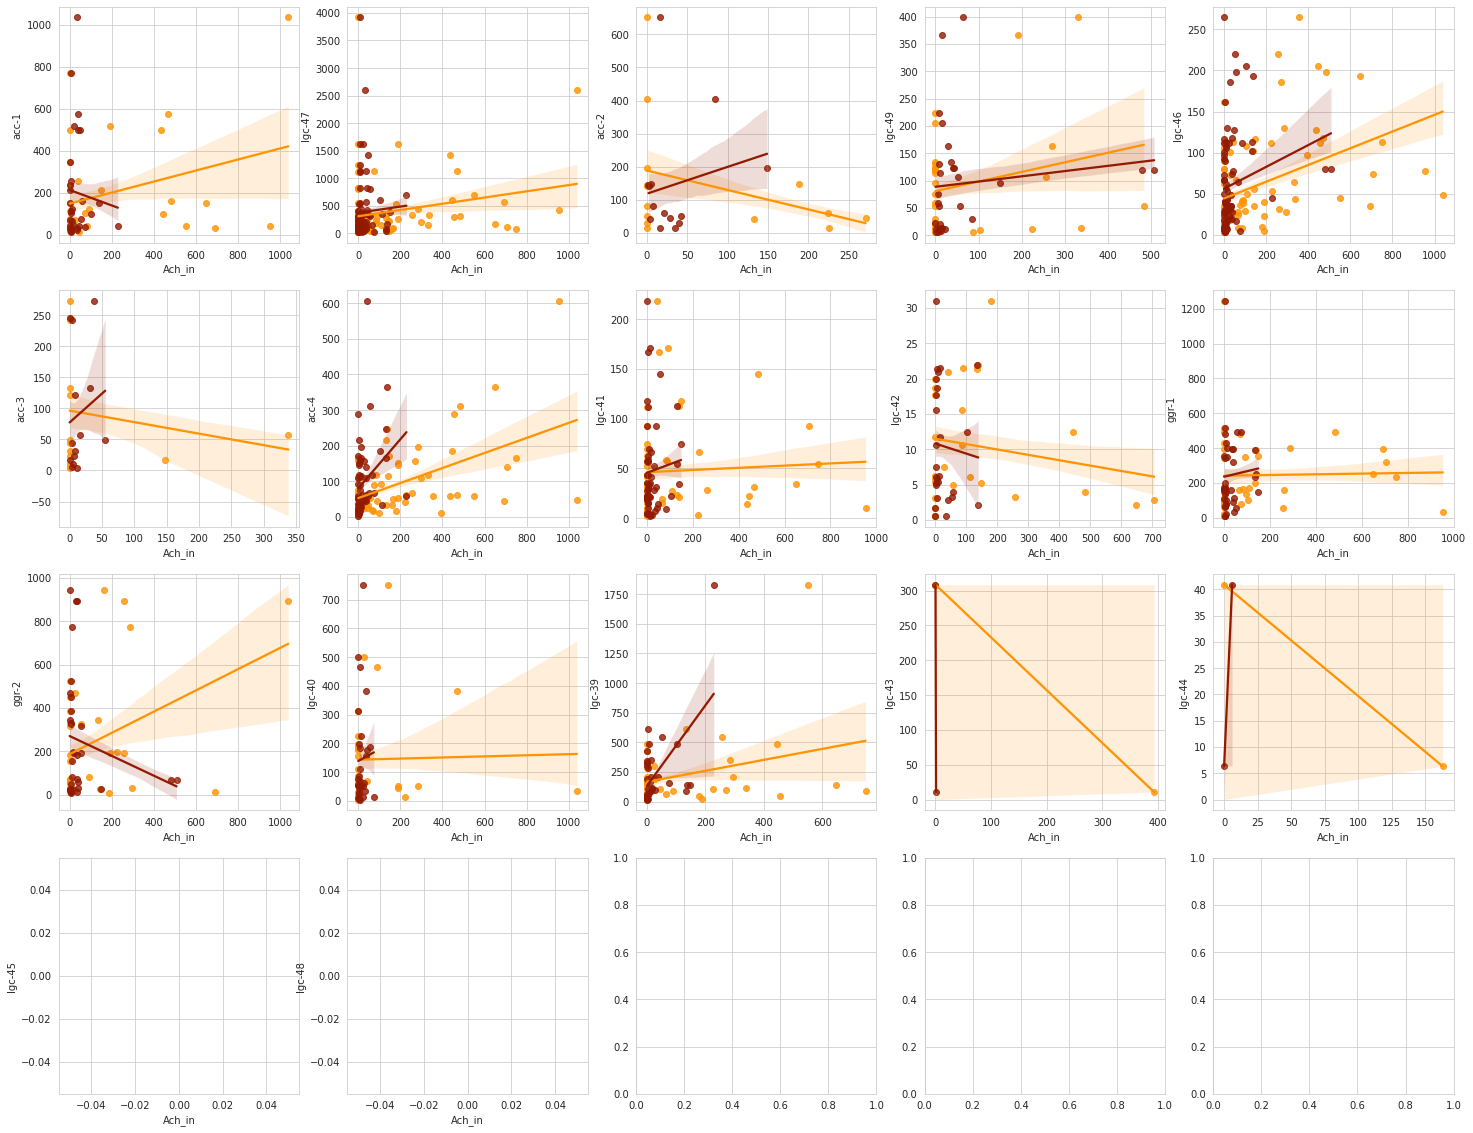

In [24]:
#Make individual correlation plots
#change grid size for total no. of pairs
fig, axes = plt.subplots(4, 5, figsize=(25, 20), sharey=False, sharex=False)

a = 0
b = 0

for col in df_exp:
  sns.regplot(ax=axes[a,b], x=df_ACh_degree.Ach_out, y=df_exp[col], ci=68, truncate=True, color='#ff9300') #orange
  sns.regplot(ax=axes[a,b],x=df_ACh_degree.Ach_in, y=df_exp[col], ci=68, truncate=True, color="#931900") #red post
  b = b+1
  if b > 4: #should be subplot y size -1
    a = a+1
    b = 0

plt.show()

In [23]:
#print correlation coefs

#prep dfs for loop
df_withzero = df.replace(np.nan, 0)
df_withzero.head()

df_ACh_degree_withzero = pd.DataFrame()

df_ACh_degree_withzero['Neuron_class'] = df_withzero['Neuron_class']
df_ACh_degree_withzero['Ach_in'] = df_withzero['Ach_in']
df_ACh_degree_withzero['Ach_out'] = df_withzero['Ach_out']

df_exp_withzero = df_withzero.drop(['Neuron_class', 'Ach_in', 'Ach_out'], axis=1)

df_exp_withzero_T = df_exp_withzero.T

lm = LinearRegression()
correlations = pd.DataFrame()
correlations_in = []
correlations_out = []

for col in df_exp_withzero:
  X = pd.DataFrame(df_ACh_degree_withzero['Ach_in'])
  y = pd.DataFrame(df_exp_withzero[col])
  lm.fit(X,y)
  c = lm.coef_
  correlations_in.append(c)

for col in df_exp_withzero:
  X = pd.DataFrame(df_ACh_degree_withzero['Ach_out'])
  y = pd.DataFrame(df_exp_withzero[col])
  lm.fit(X,y)
  d = lm.coef_
  correlations_out.append(d)

correlations['In'] = correlations_in
correlations['Out'] = correlations_out
correlations.index = df_exp_withzero_T.index
#correlations = correlations.apply(pd.to_numeric) #incase you dont have numbers?!

correlations

,In,Out
acc-1,[[0.014105566777440522]],[[0.2545319107274271]]
lgc-47,[[0.012254626406187805]],[[0.6576562704694631]]
acc-2,[[0.04466892987869203]],[[-0.03251127478642123]]
lgc-49,[[0.21030206484621888]],[[-0.0023189910138511566]]
lgc-46,[[0.18633288267826031]],[[0.13629892029760318]]
acc-3,[[-0.024433623980459215]],[[-0.02360176798271591]]
acc-4,[[0.13671396384146792]],[[0.2709788822307202]]
lgc-41,[[-0.003284229262764559]],[[0.012848970829182366]]
lgc-42,[[-0.0027959616760031857]],[[-0.0003912164259221083]]
ggr-1,[[0.056394483729380974]],[[0.09254702855578684]]


# Heatmap

In [19]:
df_sorted_out = df.sort_values("Ach_out", ascending=False)
df_sorted_out3 = df_sorted_out.set_index('Neuron_class')
df_transposed = df_sorted_out3.T
df_transposed2 = df_transposed.drop(['Ach_in', 'Ach_out', 'lgc-45', 'lgc-48'], axis=0)

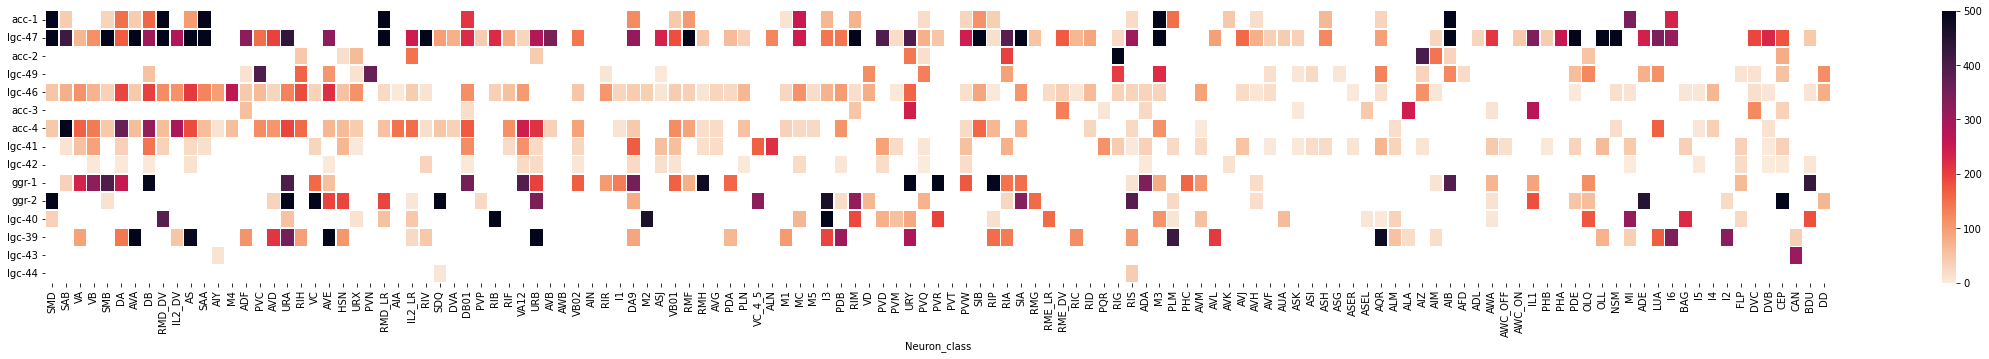

In [20]:
#Heatmap
fig, ax = plt.subplots(figsize=(40,5)) 

sns.heatmap(df_transposed2, linewidths=.5, cmap="rocket_r", vmin=0, vmax=500)

#plt.savefig('Out_nmj.pdf')

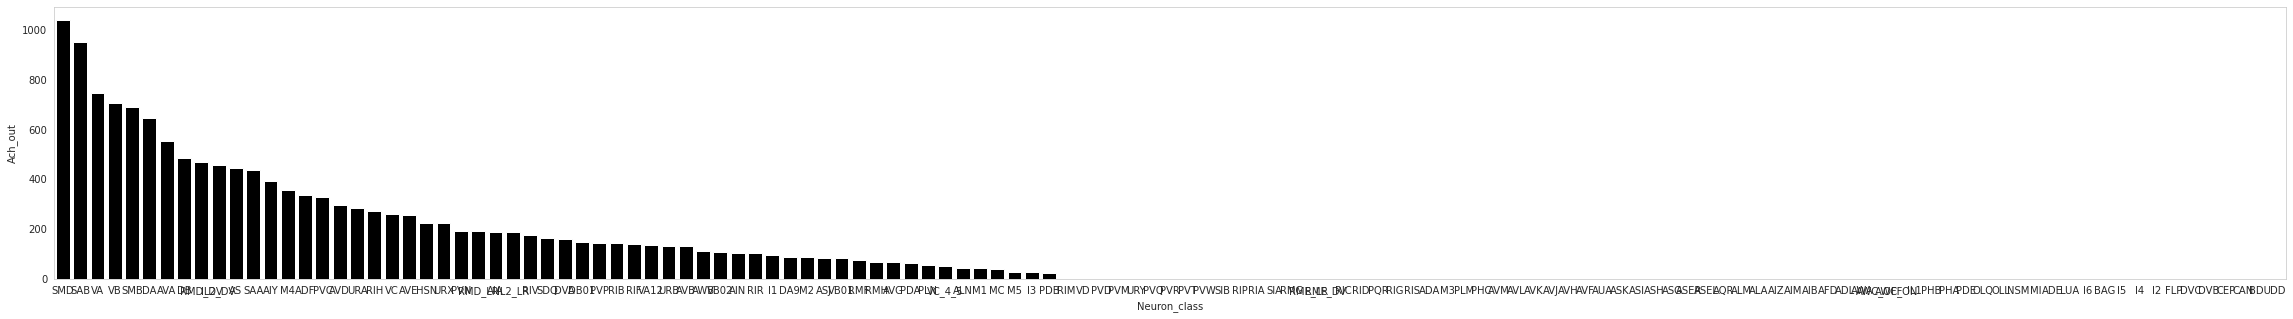

In [21]:
df_sorted2 = df.sort_values("Ach_out", ascending=False)

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(40,5)) 

sns.barplot(x="Neuron_class", y="Ach_out", data=df_sorted2, color=(0, 0, 0, 0))

ax.grid(False)

#plt.savefig('Out_bar_nmj.pdf')